---
---
## Data Cleaning

In [2]:
# Import the organization modules
import pandas as pd
import numpy as np
# Import module to ignore warnings
import warnings
warnings.filterwarnings('ignore')
# Import the plot modules
import matplotlib.pyplot as plt
import seaborn as sns
# Import own scripts
from scripts.data_cleaning import (
    read_all_csvs, 
    clean_data,
    create_csv
    )

In [3]:
# Create data frame from all single CSV files
df = read_all_csvs()
# Clean the data
df = clean_data(df)

In [20]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

from imblearn.pipeline import Pipeline



In [22]:
features = df.columns.to_list()
features.remove('state')
X = df[features]
y = df.state


# define pipeline
over = SMOTE()
under = RandomUnderSampler()
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
# transform the dataset
X, y = pipeline.fit_resample(X, y)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True, stratify=y)

---
---
## Modeling

In [44]:
# Imports
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score, f1_score, fbeta_score

---
---
### SGDClassifier

In [45]:
# Always scale the input. The most convenient way is to use a pipeline.
clf = make_pipeline(MinMaxScaler(), SGDClassifier(max_iter=10000, tol=1e-3))
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
y_pred_train = clf.predict(X_train)

In [46]:
print("f_beta_score: ", fbeta_score(y_test, y_pred, beta = 2, average = 'macro').round(2))

# Print accuracy of our model
print("Accuracy on train set:", round(accuracy_score(y_train, y_pred_train), 2))
print("Accuracy on test set:", round(accuracy_score(y_test, y_pred), 2))
print("--------"*10)

# Print classification report of our model
print(classification_report(y_test, y_pred))
print("--------"*10)

# Evaluate the model with a confusion matrix
cm = confusion_matrix(y_test, y_pred)

f_beta_score:  0.78
Accuracy on train set: 0.78
Accuracy on test set: 0.78
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

      failed       0.74      0.87      0.80     28378
  successful       0.84      0.69      0.76     28378

    accuracy                           0.78     56756
   macro avg       0.79      0.78      0.78     56756
weighted avg       0.79      0.78      0.78     56756

--------------------------------------------------------------------------------


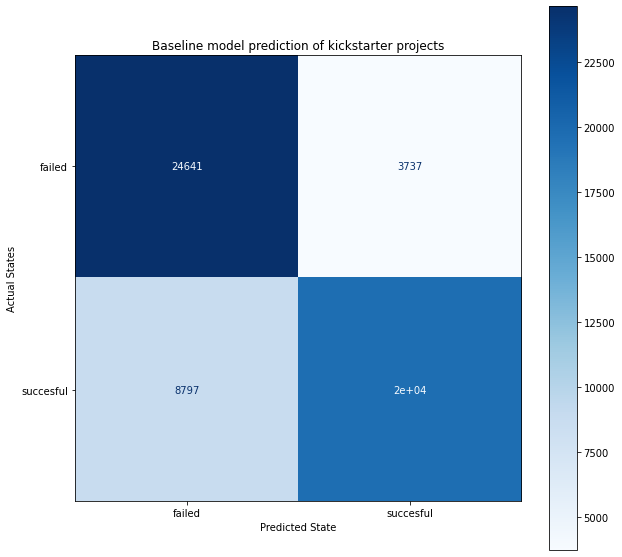

In [47]:
## Create the Confusion Matrix Display Object(cmd_obj)
cmd_obj = ConfusionMatrixDisplay(cm, display_labels=['failed', 'succesful'])
## The plot() function has to be called for the sklearn visualization
## code to do its work and the Axes object to be created.
fig, ax = plt.subplots(figsize=(10,10))

## Set the color
cmd_obj.plot(ax=ax, cmap = 'Blues')
## Use the Axes attribute 'ax_' to get to the underlying Axes object.
## The Axes object controls the labels for the X and the Y axes. It
## also controls the title.
cmd_obj.ax_.set(
                title='Baseline model prediction of kickstarter projects', 
                xlabel='Predicted State', 
                ylabel='Actual States',
                )
## Finally, call the matplotlib show() function to display the visualization
## of the Confusion Matrix.
plt.show()

Since feature importance is crucial for consulting we want to use a white box model

---
---
### DecisionTreeClassifier

In [9]:
from sklearn.tree import DecisionTreeClassifier

In [48]:
# Always scale the input. The most convenient way is to use a pipeline.
clf = make_pipeline(MinMaxScaler(), DecisionTreeClassifier(random_state=42))
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
y_pred_train = clf.predict(X_train)

In [73]:
clf.get_params()

{'memory': None,
 'steps': [('minmaxscaler', MinMaxScaler()),
  ('decisiontreeclassifier', DecisionTreeClassifier(random_state=42))],
 'verbose': False,
 'minmaxscaler': MinMaxScaler(),
 'decisiontreeclassifier': DecisionTreeClassifier(random_state=42),
 'minmaxscaler__clip': False,
 'minmaxscaler__copy': True,
 'minmaxscaler__feature_range': (0, 1),
 'decisiontreeclassifier__ccp_alpha': 0.0,
 'decisiontreeclassifier__class_weight': None,
 'decisiontreeclassifier__criterion': 'gini',
 'decisiontreeclassifier__max_depth': None,
 'decisiontreeclassifier__max_features': None,
 'decisiontreeclassifier__max_leaf_nodes': None,
 'decisiontreeclassifier__min_impurity_decrease': 0.0,
 'decisiontreeclassifier__min_samples_leaf': 1,
 'decisiontreeclassifier__min_samples_split': 2,
 'decisiontreeclassifier__min_weight_fraction_leaf': 0.0,
 'decisiontreeclassifier__random_state': 42,
 'decisiontreeclassifier__splitter': 'best'}

In [49]:
print("f_beta_score: ", fbeta_score(y_test, y_pred, beta = 2, average = 'macro').round(2))

# Print accuracy of our model
print("Accuracy on train set:", round(accuracy_score(y_train, y_pred_train), 2))
print("Accuracy on test set:", round(accuracy_score(y_test, y_pred), 2))
print("--------"*10)

# Print classification report of our model
print(classification_report(y_test, y_pred))
print("--------"*10)

# Evaluate the model with a confusion matrix
cm = confusion_matrix(y_test, y_pred)

f_beta_score:  0.75
Accuracy on train set: 1.0
Accuracy on test set: 0.75
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

      failed       0.75      0.76      0.75     28378
  successful       0.75      0.75      0.75     28378

    accuracy                           0.75     56756
   macro avg       0.75      0.75      0.75     56756
weighted avg       0.75      0.75      0.75     56756

--------------------------------------------------------------------------------


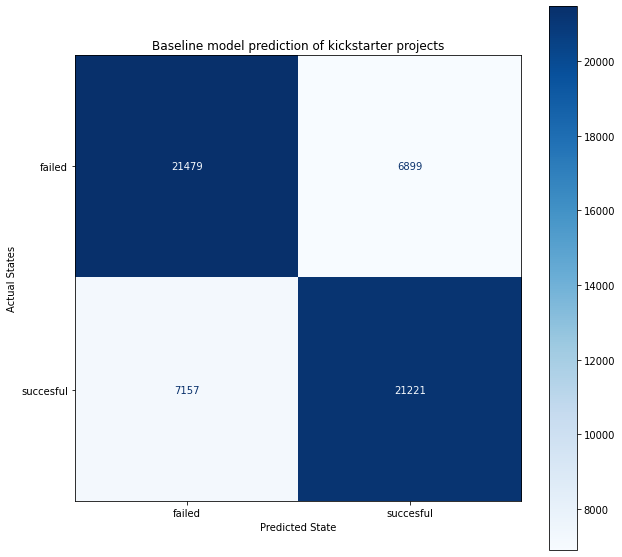

In [50]:
## Create the Confusion Matrix Display Object(cmd_obj)
cmd_obj = ConfusionMatrixDisplay(cm, display_labels=['failed', 'succesful'])
## The plot() function has to be called for the sklearn visualization
## code to do its work and the Axes object to be created.
fig, ax = plt.subplots(figsize=(10,10))

## Set the color
cmd_obj.plot(ax=ax, cmap = 'Blues')
## Use the Axes attribute 'ax_' to get to the underlying Axes object.
## The Axes object controls the labels for the X and the Y axes. It
## also controls the title.
cmd_obj.ax_.set(
                title='Baseline model prediction of kickstarter projects', 
                xlabel='Predicted State', 
                ylabel='Actual States',
                )
## Finally, call the matplotlib show() function to display the visualization
## of the Confusion Matrix.
plt.show()

#### Feature importance

In [51]:
# let's create a dictionary of features and their importance values
feat_dict= {}
for col, val in sorted(zip(X_train.columns, clf.steps[1][1].feature_importances_),key=lambda x:x[1],reverse=True):
  feat_dict[col]=val

In [55]:
feat_df = pd.DataFrame({'Feature':feat_dict.keys(),'Importance':feat_dict.values()})

feat_df

,Feature,Importance
0,goal,0.099974
1,days_prelaunch,0.069555
2,days_launched_till_changed,0.039482
3,days_total,0.030179
4,creator_name_len,0.027395
...,...,...
462,country_LU,0.000000
463,disable_communication_True,0.000000
464,is_starrable_False,0.000000
465,is_starrable_True,0.000000


In [53]:
feat_df_top_10 = feat_df.head(10)

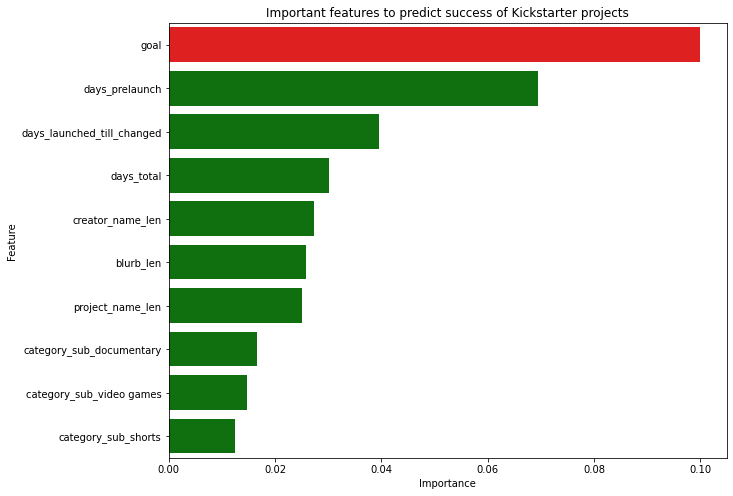

In [54]:
values = feat_df_top_10.Importance    
idx = feat_df_top_10.Feature
plt.figure(figsize=(10,8))
clrs = ['green' if (x < max(values)) else 'red' for x in values ]
sns.barplot(y=idx,x=values,palette=clrs).set(title='Important features to predict success of Kickstarter projects')
plt.show()

### Grid Search on Decision Tree

In [56]:
from sklearn import decomposition

from sklearn.model_selection import GridSearchCV

In [63]:
norm_scl = MinMaxScaler()
#pca = decomposition.PCA()
dec_tree = DecisionTreeClassifier()

In [64]:
pipe = Pipeline(steps=[('norm_slc', norm_scl),
                           #('pca', pca),
                           ('dec_tree', dec_tree)])

In [65]:
#n_components = list(range(1,X.shape[1]+1,1))

In [66]:
    criterion = ['gini', 'entropy']
    max_depth = [2,4,6,8,10,12]

In [67]:
    parameters = dict(#pca__n_components=n_components,
                      dec_tree__criterion=criterion,
                      dec_tree__max_depth=max_depth)

In [68]:
clf_GS = GridSearchCV(pipe, parameters)
clf_GS.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('norm_slc', MinMaxScaler()),
                                       ('dec_tree', DecisionTreeClassifier())]),
             param_grid={'dec_tree__criterion': ['gini', 'entropy'],
                         'dec_tree__max_depth': [2, 4, 6, 8, 10, 12]})

In [69]:
print('Best Criterion:', clf_GS.best_estimator_.get_params()['dec_tree__criterion'])
print('Best max_depth:', clf_GS.best_estimator_.get_params()['dec_tree__max_depth'])
#print('Best Number Of Components:', clf_GS.best_estimator_.get_params()['pca__n_components'])
print(); print(clf_GS.best_estimator_.get_params()['dec_tree'])

Best Criterion: gini
Best max_depth: 12

DecisionTreeClassifier(max_depth=12)


In [70]:
y_pred = clf_GS.predict(X_test)
y_pred_train = clf_GS.predict(X_train)

In [71]:
print("f_beta_score: ", fbeta_score(y_test, y_pred, beta = 2, average = 'macro').round(2))

# Print accuracy of our model
print("Accuracy on train set:", round(accuracy_score(y_train, y_pred_train), 2))
print("Accuracy on test set:", round(accuracy_score(y_test, y_pred), 2))
print("--------"*10)

# Print classification report of our model
print(classification_report(y_test, y_pred))
print("--------"*10)

# Evaluate the model with a confusion matrix
cm = confusion_matrix(y_test, y_pred)

f_beta_score:  0.71
Accuracy on train set: 0.72
Accuracy on test set: 0.71
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

      failed       0.68      0.80      0.73     28378
  successful       0.75      0.62      0.68     28378

    accuracy                           0.71     56756
   macro avg       0.72      0.71      0.71     56756
weighted avg       0.72      0.71      0.71     56756

--------------------------------------------------------------------------------


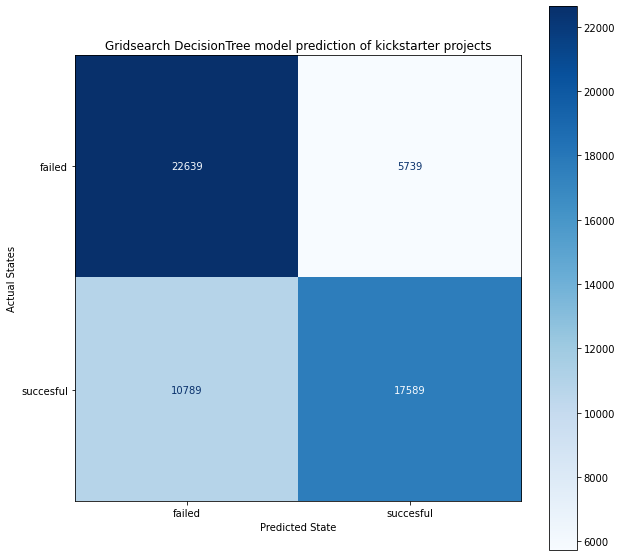

In [133]:
## Create the Confusion Matrix Display Object(cmd_obj)
cmd_obj = ConfusionMatrixDisplay(cm, display_labels=['failed', 'succesful'])
## The plot() function has to be called for the sklearn visualization
## code to do its work and the Axes object to be created.
fig, ax = plt.subplots(figsize=(10,10))

## Set the color
cmd_obj.plot(ax=ax, cmap = 'Blues')
## Use the Axes attribute 'ax_' to get to the underlying Axes object.
## The Axes object controls the labels for the X and the Y axes. It
## also controls the title.
cmd_obj.ax_.set(
                title='Gridsearch DecisionTree model prediction of kickstarter projects', 
                xlabel='Predicted State', 
                ylabel='Actual States',
                )
## Finally, call the matplotlib show() function to display the visualization
## of the Confusion Matrix.
plt.show()

In [84]:
# let's create a dictionary of features and their importance values
feat_dict= {}
for col, val in sorted(zip(X_train.columns, clf_GS.best_estimator_.steps[1][1].feature_importances_),key=lambda x:x[1],reverse=True):
  feat_dict[col]=val

feat_df = pd.DataFrame({'Feature':feat_dict.keys(),'Importance':feat_dict.values()})

feat_df

,Feature,Importance
0,goal,0.242266
1,days_prelaunch,0.160461
2,days_launched_till_changed,0.047243
3,category_sub_documentary,0.044170
4,category_sub_nonfiction,0.035969
...,...,...
462,category_sub_webseries,0.000000
463,category_sub_woodworking,0.000000
464,category_sub_workshops,0.000000
465,category_sub_young adult,0.000000


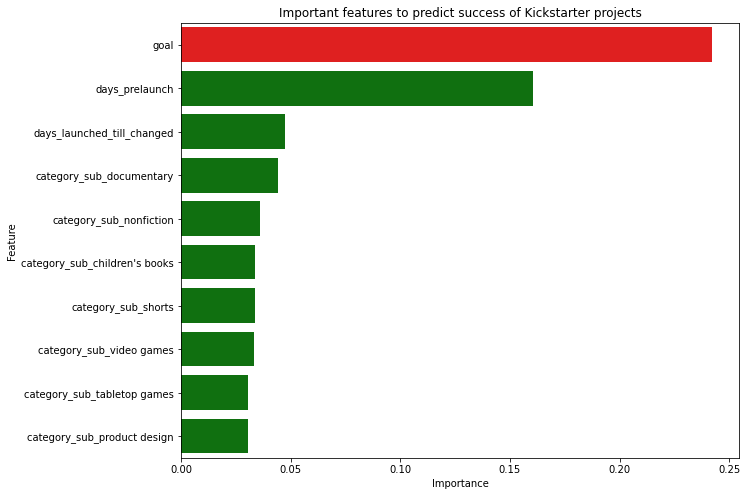

In [85]:
feat_df_top_10 = feat_df.head(10)

values = feat_df_top_10.Importance    
idx = feat_df_top_10.Feature
plt.figure(figsize=(10,8))
clrs = ['green' if (x < max(values)) else 'red' for x in values ]
sns.barplot(y=idx,x=values,palette=clrs).set(title='Important features to predict success of Kickstarter projects')
plt.show()

In [109]:
X_test['right_pred'] = (y_test == y_pred)

In [110]:
X_test.right_pred.value_counts()

True     40228
False    16528
Name: right_pred, dtype: int64

<AxesSubplot:xlabel='goal', ylabel='days_prelaunch'>

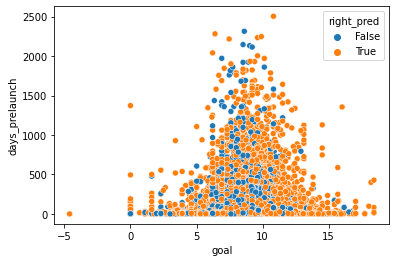

In [113]:
sns.scatterplot(data=X_test, x=np.log(X_test.goal), y=X_test.days_prelaunch, hue=X_test.right_pred
#, hue=mispredictions.state
)

<AxesSubplot:xlabel='goal', ylabel='days_prelaunch'>

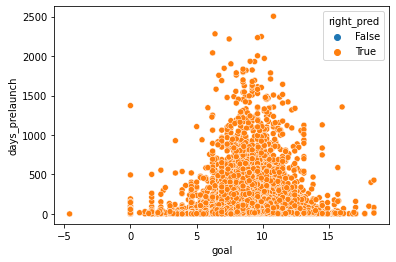

In [125]:
sns.scatterplot(data=X_test[X_test['right_pred'] == True], x=np.log(X_test[X_test['right_pred'] == True].goal), y=X_test[X_test['right_pred'] == True].days_prelaunch
#, hue=mispredictions.state
, hue=X_test.right_pred
)

<AxesSubplot:xlabel='goal', ylabel='days_prelaunch'>

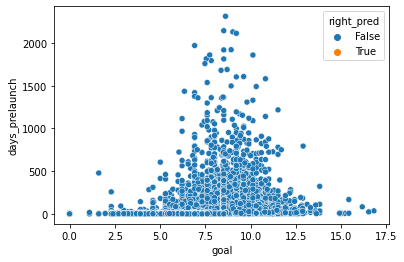

In [124]:
sns.scatterplot(data=X_test[X_test['right_pred'] == False], x=np.log(X_test[X_test['right_pred'] == False].goal), y=X_test[X_test['right_pred'] == False].days_prelaunch
                #, hue=mispredictions.state
                , hue=X_test.right_pred
)

<AxesSubplot:xlabel='goal', ylabel='days_total'>

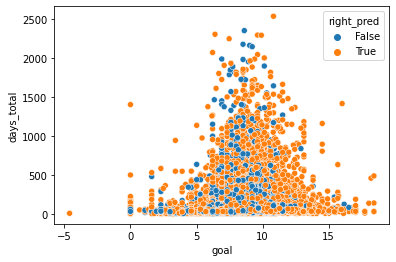

In [126]:
sns.scatterplot(data=X_test, x=np.log(X_test.goal), y=X_test.days_total, hue=X_test.right_pred
#, hue=mispredictions.state
)

<AxesSubplot:xlabel='goal', ylabel='creator_name_len'>

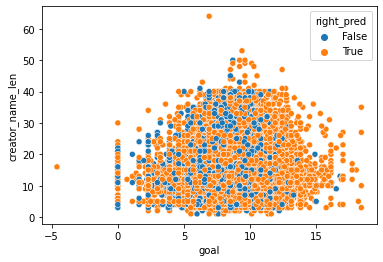

In [130]:
sns.scatterplot(data=X_test, x=np.log(X_test.goal), y=X_test.creator_name_len, hue=X_test.right_pred
#, hue=mispredictions.state
)

<AxesSubplot:xlabel='goal', ylabel='creator_name_len'>

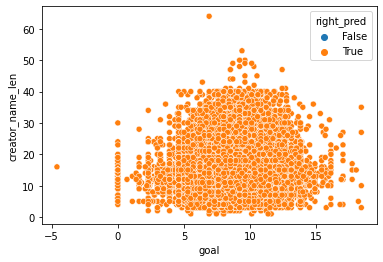

In [131]:
sns.scatterplot(data=X_test[X_test['right_pred'] == True], x=np.log(X_test[X_test['right_pred'] == True].goal), y=X_test[X_test['right_pred'] == True].creator_name_len
#, hue=mispredictions.state
, hue=X_test.right_pred
)

<AxesSubplot:xlabel='goal', ylabel='creator_name_len'>

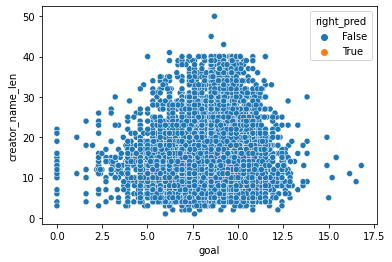

In [132]:
sns.scatterplot(data=X_test[X_test['right_pred'] == False], x=np.log(X_test[X_test['right_pred'] == False].goal), y=X_test[X_test['right_pred'] == False].creator_name_len
#, hue=mispredictions.state
, hue=X_test.right_pred
)